In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy
from scipy.interpolate import interp1d

from matplotlib import colors
#------------------------------

import matplotlib.pyplot as plt

In [23]:
import numpy as np
import pandas as pd
import scipy.stats as sps
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings("ignore")

from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', palette='Set2')

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
import sklearn.preprocessing
from sklearn.calibration import CalibrationDisplay
from sklearn.calibration import calibration_curve
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs, make_classification

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from dataloader import Sub, get_audio_encoding
from models import LinearDeltaModel
from visualizer import Visualizer
import utils
import models
import librosa

import os
import tensorflow as tf
import tensorflow_io as tfio

import torch

import nibabel as nib
from nilearn.plotting import plot_stat_map, plot_anat, plot_img, show

import statsmodels.api as sm
from tqdm.auto import tqdm
import einops

{}
6.398903008656991e-05
TEST


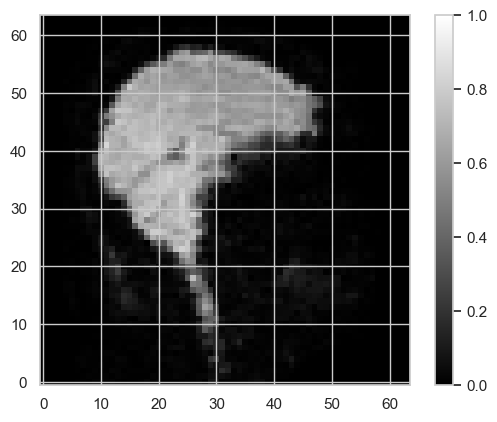

PREDICTED


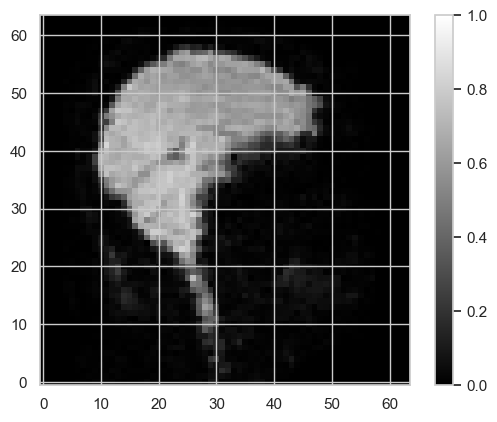

DIFFERENCE


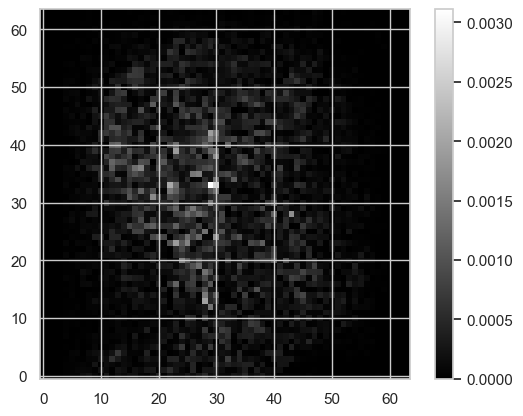

In [53]:
from dataloader import Sub, get_audio_encoding
X = get_audio_encoding()
sub = Sub('07')
print (get_audio_encoding.__dict__)
lindelta = LinearDeltaModel(X, sub, 10, 1, 1000)
lindelta.fit()
lindelta.predict()
lindelta.evaluate()
print(lindelta.MSE_test)
visualizer = Visualizer(lindelta)

visualizer.show_scan_slices(37, 0, 22)

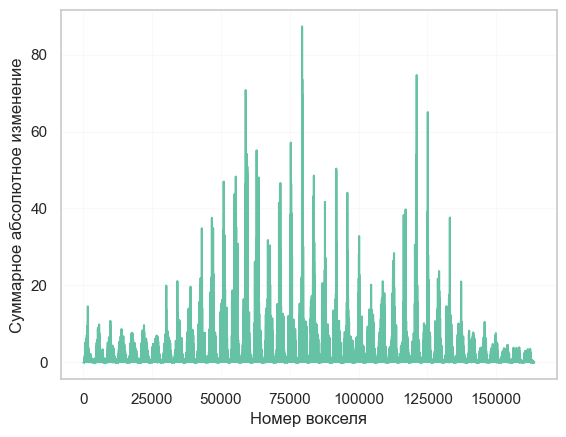

In [54]:
delta_voxels = abs(lindelta.deltaY_train).sum(axis=1)
plt.plot(delta_voxels)
plt.xlabel('Номер вокселя')
plt.ylabel('Суммарное абсолютное изменение')
plt.grid(alpha=0.1)
plt.show()

In [66]:
def evaluate(lindelta: LinearDeltaModel):
    d1, d2, d3 = lindelta._d1, lindelta._d2, lindelta._d3
    mask1 = np.ones((d1, d2, d3))
    mask1.T[:d3//2, :, :] = 0
    mask1.T[:, :d2//4, :] = 0
    mask1.T[:, d2//2: , :] = 0
    mask1 = mask1.reshape(d1*d2*d3)
    delta_voxels = abs(lindelta.deltaY_train).sum(axis=1)
    array = delta_voxels * mask1
    #bound = (delta_voxels * mask1).max() / 2
    #bound = (array[array>0]).max() / 4
    bound = np.quantile(array[array>0], 1 - 1/16)
    mask = array > bound
    difference = lindelta.Y_test_predicted - np.delete(lindelta.Y_test, 0, 1)
    MSE_test = utils.MSE(difference[np.nonzero(mask)])
    return MSE_test

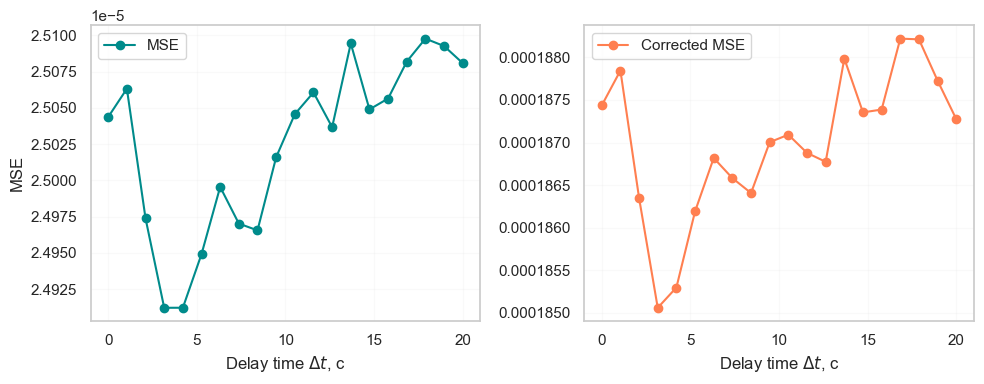

In [62]:
t = np.linspace(0, 20, 20)

MSE = []
MSE_corrected = []
sub = Sub('07')

for dt in t:
    lindelta = LinearDeltaModel(X, sub, dt, 2, 1000)
    #lindelta = LinearDeltaModel(occur, sub, dt, 4, 1000)
    lindelta.fit()
    lindelta.predict()
    lindelta.evaluate()
    MSE.append(lindelta.MSE_test)
    MSE_corrected.append(evaluate(lindelta))
    
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].plot(t, MSE, marker='o', color="darkcyan", label=r"MSE")
#ax[0].set_xlabel("Время задержки $\Delta t$, с")
ax[0].set_xlabel("Delay time $\Delta t$, с")
ax[0].set_ylabel("MSE")
ax[0].legend()
ax[0].grid(alpha=0.1)

ax[1].plot(t, MSE_corrected, marker='o', color="coral", label=r"Corrected MSE")
#ax[1].set_xlabel("Время задержки $\Delta t$, с")
ax[1].set_xlabel("Delay time $\Delta t$, с")
#ax[1].set_ylabel("MSE")
ax[1].legend()
ax[1].grid(alpha=0.1)

plt.tight_layout()
plt.savefig("mse_dt.pdf", bbox_inches="tight")
plt.show()

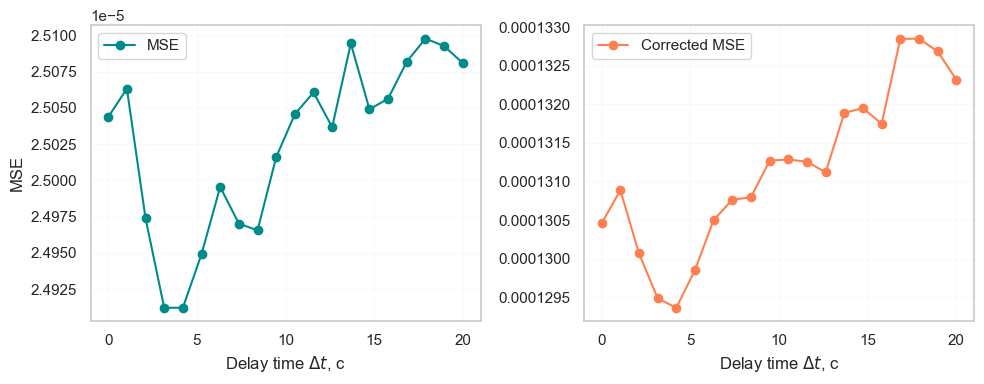

In [35]:
t = np.linspace(0, 20, 20)

MSE = []
MSE_corrected = []
sub = Sub('07')

for dt in t:
    lindelta = LinearDeltaModel(X, sub, dt, 2, 1000)
    #lindelta = LinearDeltaModel(occur, sub, dt, 4, 1000)
    lindelta.fit()
    lindelta.predict()
    lindelta.evaluate()
    MSE.append(lindelta.MSE_test)
    MSE_corrected.append(evaluate(lindelta))
    
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].plot(t, MSE, marker='o', color="darkcyan", label=r"MSE")
#ax[0].set_xlabel("Время задержки $\Delta t$, с")
ax[0].set_xlabel("Delay time $\Delta t$, с")
ax[0].set_ylabel("MSE")
ax[0].legend()
ax[0].grid(alpha=0.1)

ax[1].plot(t, MSE_corrected, marker='o', color="coral", label=r"Corrected MSE")
#ax[1].set_xlabel("Время задержки $\Delta t$, с")
ax[1].set_xlabel("Delay time $\Delta t$, с")
#ax[1].set_ylabel("MSE")
ax[1].legend()
ax[1].grid(alpha=0.1)

plt.tight_layout()
plt.savefig("mse_dt.pdf", bbox_inches="tight")
plt.show()

9.032343043849941e-05
TEST


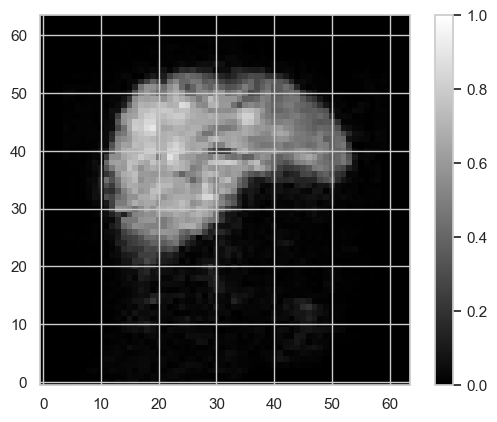

PREDICTED


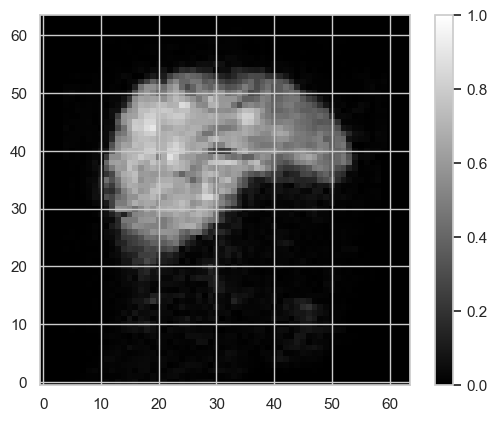

DIFFERENCE


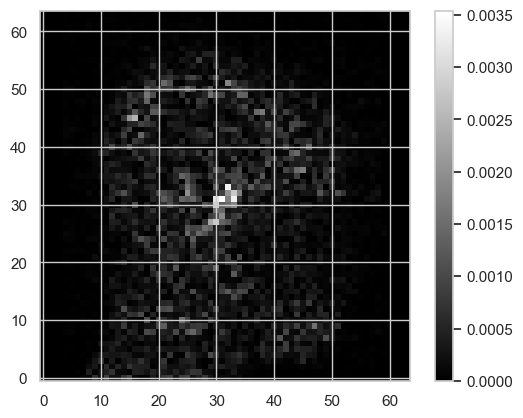

In [63]:
X = get_audio_encoding()
sub = Sub('31')
lindelta = LinearDeltaModel(X, sub, 10, 1, 1000)
lindelta.fit()
lindelta.predict()
lindelta.evaluate()
print(lindelta.MSE_test)

visualizer = Visualizer(lindelta)

visualizer.show_scan_slices(37, 0, 20)

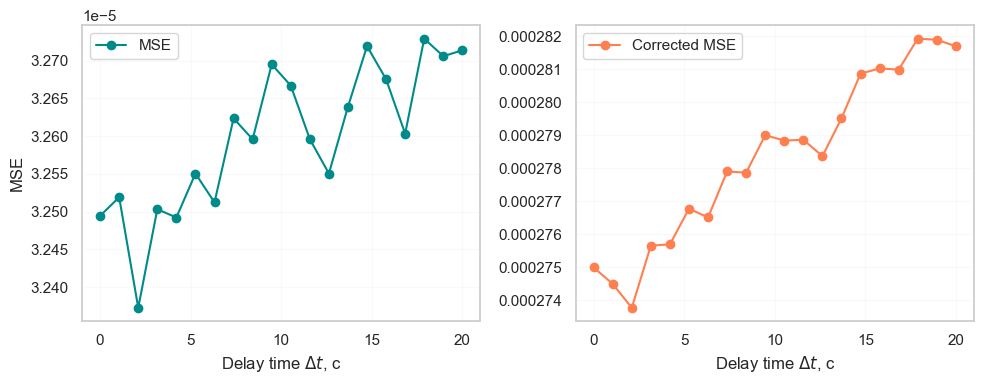

In [67]:
t = np.linspace(0, 20, 20)
sub = Sub('31')
MSE = []
MSE_corrected = []

for dt in t:
    lindelta = LinearDeltaModel(X, sub, dt, 2, 1000)
    #lindelta = LinearDeltaModel(occur, sub, dt, 4, 1000)
    lindelta.fit()
    lindelta.predict()
    lindelta.evaluate()
    MSE.append(lindelta.MSE_test)
    MSE_corrected.append(evaluate(lindelta))
    

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].plot(t, MSE, marker='o', color="darkcyan", label=r"MSE")
#ax[0].set_xlabel("Время задержки $\Delta t$, с")
ax[0].set_xlabel("Delay time $\Delta t$, с")
ax[0].set_ylabel("MSE")
ax[0].legend()
ax[0].grid(alpha=0.1)

ax[1].plot(t, MSE_corrected, marker='o', color="coral", label=r"Corrected MSE")
#ax[1].set_xlabel("Время задержки $\Delta t$, с")
ax[1].set_xlabel("Delay time $\Delta t$, с")
#ax[1].set_ylabel("MSE")
ax[1].legend()
ax[1].grid(alpha=0.1)

plt.tight_layout()
plt.savefig("mse_dt.pdf", bbox_inches="tight")
plt.show()

0.0001050186798340877
TEST


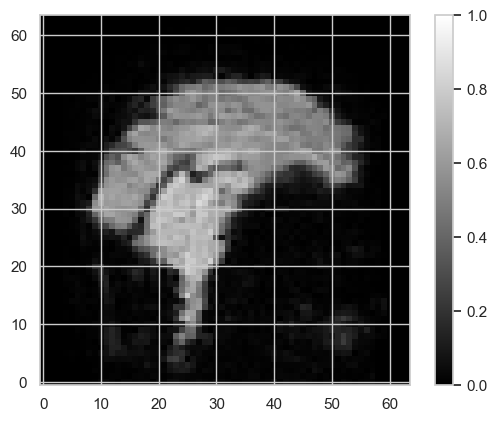

PREDICTED


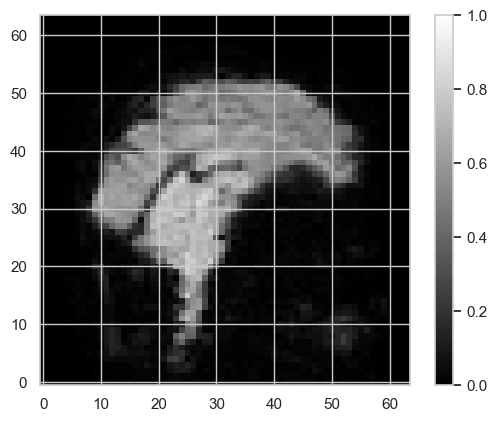

DIFFERENCE


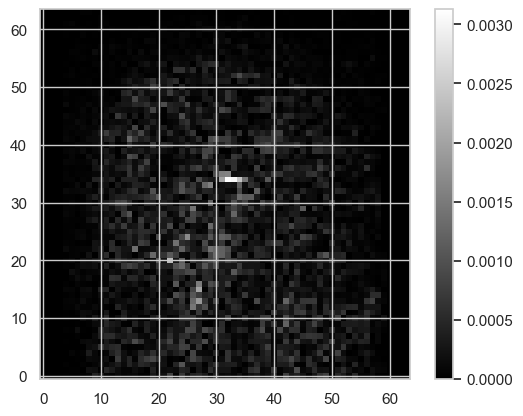

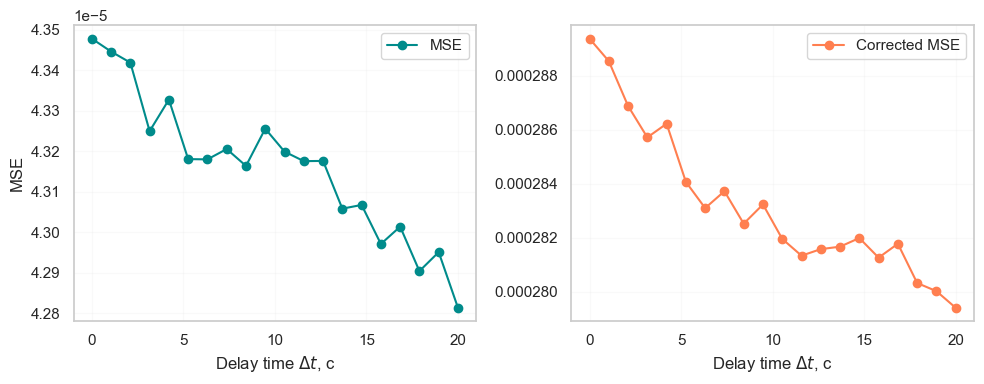

In [68]:
X = get_audio_encoding()
sub = Sub('60')
lindelta = LinearDeltaModel(X, sub, 10, 1, 1000)
lindelta.fit()
lindelta.predict()
lindelta.evaluate()
print(lindelta.MSE_test)
visualizer = Visualizer(lindelta)

visualizer.show_scan_slices(37, 0, 20)

t = np.linspace(0, 20, 20)

MSE = []
MSE_corrected = []

for dt in t:
    lindelta = LinearDeltaModel(X, sub, dt, 2, 1000)
    #lindelta = LinearDeltaModel(occur, sub, dt, 4, 1000)
    lindelta.fit()
    lindelta.predict()
    lindelta.evaluate()
    MSE.append(lindelta.MSE_test)
    MSE_corrected.append(evaluate(lindelta))
    

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].plot(t, MSE, marker='o', color="darkcyan", label=r"MSE")
#ax[0].set_xlabel("Время задержки $\Delta t$, с")
ax[0].set_xlabel("Delay time $\Delta t$, с")
ax[0].set_ylabel("MSE")
ax[0].legend()
ax[0].grid(alpha=0.1)

ax[1].plot(t, MSE_corrected, marker='o', color="coral", label=r"Corrected MSE")
#ax[1].set_xlabel("Время задержки $\Delta t$, с")
ax[1].set_xlabel("Delay time $\Delta t$, с")
#ax[1].set_ylabel("MSE")
ax[1].legend()
ax[1].grid(alpha=0.1)

plt.tight_layout()
plt.savefig("mse_dt.pdf", bbox_inches="tight")
plt.show()

7.461968831597377e-05
TEST


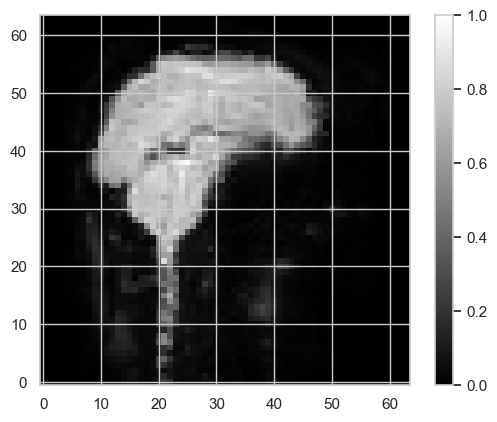

PREDICTED


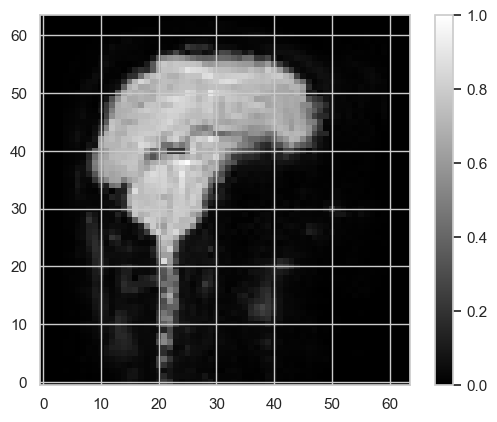

DIFFERENCE


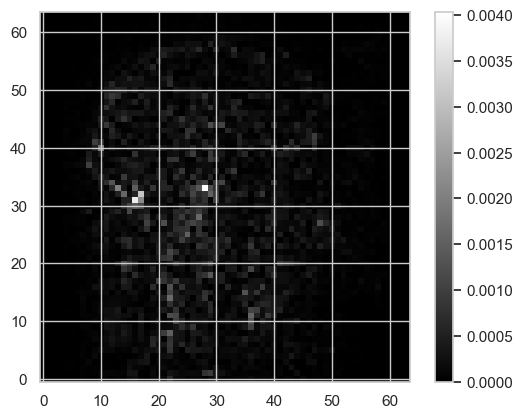

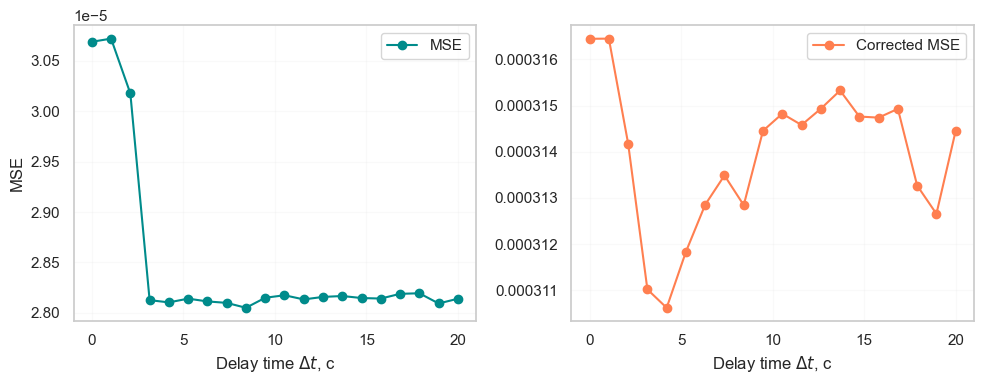

In [70]:
X = get_audio_encoding()
sub = Sub('22')
lindelta = LinearDeltaModel(X, sub, 10, 1, 1000)
lindelta.fit()
lindelta.predict()
lindelta.evaluate()
print(lindelta.MSE_test)
visualizer = Visualizer(lindelta)

visualizer.show_scan_slices(37, 0, 20)

t = np.linspace(0, 20, 20)

MSE = []
MSE_corrected = []

for dt in t:
    lindelta = LinearDeltaModel(X, sub, dt, 2, 1000)
    #lindelta = LinearDeltaModel(occur, sub, dt, 4, 1000)
    lindelta.fit()
    lindelta.predict()
    lindelta.evaluate()
    MSE.append(lindelta.MSE_test)
    MSE_corrected.append(evaluate(lindelta))
    

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].plot(t, MSE, marker='o', color="darkcyan", label=r"MSE")
#ax[0].set_xlabel("Время задержки $\Delta t$, с")
ax[0].set_xlabel("Delay time $\Delta t$, с")
ax[0].set_ylabel("MSE")
ax[0].legend()
ax[0].grid(alpha=0.1)

ax[1].plot(t, MSE_corrected, marker='o', color="coral", label=r"Corrected MSE")
#ax[1].set_xlabel("Время задержки $\Delta t$, с")
ax[1].set_xlabel("Delay time $\Delta t$, с")
#ax[1].set_ylabel("MSE")
ax[1].legend()
ax[1].grid(alpha=0.1)

plt.tight_layout()
plt.savefig("mse_dt.pdf", bbox_inches="tight")
plt.show()